# Домашнее задание 

1. Изучить паттерны проектирования:
* [Builder (Строитель)](https://refactoring.guru/ru/design-patterns/builder)
* [Composite (Компоновщик)](https://refactoring.guru/ru/design-patterns/composite)
 
2. Разработать иерархию классов для рисования простых фигур (BoxView, TextView) и составных из них фигур (CompositeView, паттерн Composite)
* спроектировать 
* нарисовать разработанную иерархию классов, используя [Plant UML](https://plantuml.com/ru/class-diagram)
* реализовать разработанную иерархию, используя для рисования функции [ipycnvas](https://ipycanvas.readthedocs.io/en/latest/)

При реализации каждого класса, отдельной клеточкой делать тест для его тестирования и отладки

3. Разработать простой геномный браузер для визуализации генов
* использовать подход [Model-View-Controller](https://ru.wikipedia.org/wiki/Model-View-Controller)
* Разработать модель гена, изобразить ее используя [Plant UML](https://plantuml.com/ru/class-diagram)
* Для генерации View для гена использовать шаблон [Composite (Компоновщик)](https://refactoring.guru/ru/design-patterns/composite)

4. Продемонстрировать работу геномного браузера, получив примерно такую картинку

<img src="https://gitlab.sirius-web.org/students/2021/kolpakov.fa/python-for-beginners/-/raw/master/lections/files_and_images/gene_view.png">

## Подсказки

### Интерфейс View, BaseView
приведены ниже

### определение размера текста для TextView
def textSize(x, y, text, font_size, font_name):
    '''
    Некоторая проблема - узнать размер отображения текста.
    Напрямую библиотека pycanvas не имеет такого метода, поэтому мы делаем некоторую эвристику, чтобы угадать размер текста.
    
    Параметры:
    x, y - координаты, используемые для рисования текста в pycanvas
    text - текст, для которого рассчитывается размер
    font_size - размер шрифта
    
    Возвращает Rectangle, описывающий размер заданного текста.
    '''
    k = 0.55
    if font_name != 'monospace': 
        k = 0.47
    
    return Rectangle(x, y, font_size*len(text)*k, font_size*1)

### версия с заголовками и тестами
это версия с тестами и заготовками классов, которые использовал преподаватель для выполнения этой работы.


## Рисование диаграмм черер PlantUML и kroki
https://github.com/sunhwan/jupyter-kroki-magic
https://ipython.readthedocs.io/en/stable/config/custommagics.html#defining-magics

In [1]:
# поддержка типа клеток %%kroki
import requests
from IPython.display import SVG, display
from IPython.core.magic import register_cell_magic

diagrams_supported = set(['blockdiag', 'seqdiag', 'mermaid', 'actdiag', 'nwdiag',
                          'packetdiag', 'rackdiag', 'erd', 'nomnoml', 'plantuml',
                          'umlet', 'wavedrom', 'bpmn', 'bytefield', 'pikchr',
                          'graphviz', 'vega', 'vega-lite', 'ditaa', 'svgbob'])


@register_cell_magic
def kroki(line, cell):
        "simple wrapper for kroki.io"
        
        if line not in diagrams_supported:
            raise NotImplemented
            
        url = 'https://kroki.io'
        r = requests.post(f'{url}/{line}/svg', json={'diagram_source': cell})
        if r.status_code == 200:
            return display(SVG(r.text))
        else:
            raise ValueError


## Примеры диаграмм 

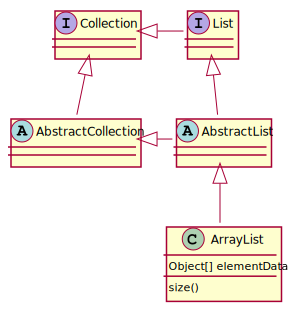

In [2]:
%%kroki plantuml

abstract class AbstractList
abstract AbstractCollection
interface List
interface Collection

List <|-- AbstractList
Collection <|-- AbstractCollection

Collection <|- List
AbstractCollection <|- AbstractList
AbstractList <|-- ArrayList

class ArrayList {
  Object[] elementData
  size()
}

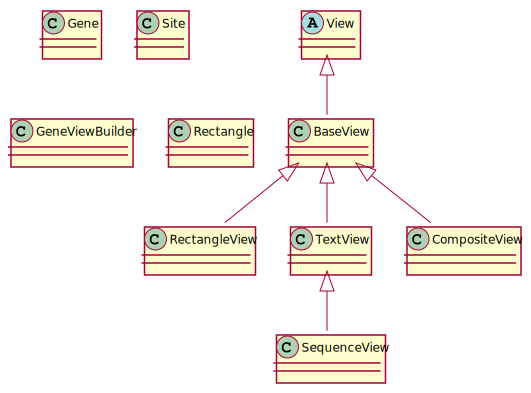

In [277]:
%%kroki plantuml

abstract class View
class BaseView
class RectangleView
class TextView
class SequenceView
class CompositeView


class Gene
class Site
class GeneViewBuilder 


class Rectangle

View <|-- BaseView
BaseView <|-- RectangleView
BaseView <|-- TextView
TextView <|-- SequenceView

BaseView <|-- CompositeView

# Иерархия классов для рисования

In [3]:
from abc import abstractmethod
from ipycanvas import Canvas

In [4]:
class Rectangle:
    '''Используется для представления минимального прямоугольника, описывающего заданную фигуру.'''
    
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
    
    def __str__(self):
        return f'Rectangle ({self.x}, {self.y}) {self.width}x{self.height}'

## View

In [5]:
class View:
    '''Абстрактный базовый класс для представления и рисования фигур'''

    @abstractmethod
    def get_bounds(self):
        ''' Возвращает размеры минимального прямоугольника, описывающего данную фигуру.'''
        pass

    @abstractmethod
    def draw(self, canvas):
        ''' 
        Рисует фигуру на холсте 
        
        Параметры:
        canvas - холст для рисования
        '''     
        pass
    
    @abstractmethod
    def move(self, x, y):
        ''' Перемещает верхний левый угол границы фигуры в координаты (x, y) '''     
        pass

    @abstractmethod
    def align_vertical(self, view, alignment, offset):
        ''' 
        Выравнивает фигуру по вертикалии относительно заданной фигуры
        
        Параметры:
        view - фигура, относительно которой происходит выравнивание
        alignment - выравнивание, возможные значения (view_текущая фигура):
            top_top, top_center, top_bottom
            center_top, center_center, center_bottom
            bottom_top, bottom_cente, bottom_bottom
        '''     
        pass

    @abstractmethod
    def align_horisontal(self, view, alignment, offset):
        ''' 
        Выравнивает фигуру по горизонтали относительно заданной фигуры
        
        Параметры:
        view - фигура, относительно которой происходит выравнивание
        alignment - выравнивание, возможные значения (view_текущая фигура):
            left_left, left_center, left_right
            center_left, center_center, center_right
            right_left, rightcenter, right_right
        '''     
        pass
  
    

## BaseView

In [6]:
class BaseView(View):
    
    def __init__(self, x, y, width, height):
        '''задает границы минимального прямоугольника, описывающего заданную фигуру'''
        self.bounds = Rectangle(x, y, width, height)

    def getBounds(self):
        return self.bounds;
    
    def move(self, x, y):
        self.bounds.x = x
        self.bounds.y = y
        
    def align_vertical(self, view, alignment, offset=0):
        r1 = view.bounds
        height = self.bounds.height

        if alignment == 'top_top':            y = r1.y + offset
        elif alignment == 'top_center':       y = r1.y - height/2
        elif alignment == 'top_bottom':       y = r1.y - height - offset
        
        elif alignment == 'center_top':       y = r1.y + r1.height/2 + offset
        elif alignment == 'center_center':    y = r1.y + r1.height/2 - height/2
        elif alignment == 'center_bottom':    y = r1.y + r1.height/2 - height + offset
        
        elif alignment == 'bottom_top':       y = r1.y + r1.height + offset
        elif alignment == 'bottom_center':    y = r1.y + r1.height - height/2
        elif alignment == 'bottom_bottom':    y = r1.y + r1.height - height + offset

        self.move(self.bounds.x, y)
        
    def align_horisontal(self, view, alignment, offset=0):
        r1 = view.bounds
        width = self.bounds.width
        
        if alignment == 'left_left':          x = r1.x + offset
        elif alignment == 'left_center':      x = r1.x - width/2
        elif alignment == 'left_right':       x = r1.x - width - offset
        
        elif alignment == 'center_left':      x = r1.x + r1.width/2 + offset
        elif alignment == 'center_center':    x = r1.x + r1.width/2 - width/2
        elif alignment == 'center_right':     x = r1.x + r1.width/2 - width + offset
        
        elif alignment == 'right_left':       x = r1.x + r1.width + offset
        elif alignment == 'right_center':     x = r1.x + r1.width - width/2
        elif alignment == 'right_right':      x = r1.x + r1.width - width + offset

        self.move(x, self.bounds.y)    

In [7]:
# тест на выравниеание фигур друг относительно друга
# ...
figure1 = BaseView(100, 100, 200, 400)
print(figure1.getBounds())
figure2 = BaseView(1000, 200, 500, 500)
print(figure2.getBounds())
figure1.align_vertical(figure2, 'center_center')
print(figure1.getBounds())


Rectangle (100, 100) 200x400
Rectangle (1000, 200) 500x500
Rectangle (100, 250.0) 200x400


## RectangleView

In [8]:
class RectangleView(BaseView):
    '''
    Класс для рисования прямоугольника.
    
    Прямоугольник имеет следующие параметры:
    x, y, width, height -положение и размер прямоугольника
    fill_style - цвет и стиль заливки прямоугольника (может отсутствовать)
    stroke_style - цвет и стиль границы прямоугольника (может отсутствовать)
    
    '''
    
    def __init__(self, x, y, width, height, fill_style=None, stroke_style=None):
        super().__init__(x, y, width, height) # super() method lets you access methods from a parent class from within a child class
        self.fill_style = fill_style
        self.stroke_style = stroke_style

    def from_rectangle(rectangle, fill_style=None, stroke_style=None):
        return RectangleView(rectangle.x, rectangle.y, 
                             rectangle.width, rectangle.height,
                             fill_style, stroke_style
                            )
        
    def draw(self, canvas):
        
        if self.fill_style:
            canvas.fill_style = self.fill_style
            canvas.fill_rect(
                self.bounds.x, 
                self.bounds.y, 
                self.bounds.width, 
                self.bounds.height
            )            

        if self.stroke_style:
            canvas.stroke_style = self.stroke_style
            canvas.stroke_rect(
                self.bounds.x, 
                self.bounds.y, 
                self.bounds.width, 
                self.bounds.height
            )               

In [9]:
#тест
canvas = Canvas(width=200, height=60)

rv = RectangleView(20, 10, 100, 50, fill_style="red", stroke_style="black")
rv.draw(canvas)

canvas

Canvas(height=60, width=200)

## TextView

In [10]:
 def textSize(x, y, text, font_size, font_name):
    '''
    Некоторая проблема - узнать размер отображения текста.
    Напрямую библиотека pycanvas не имеет такого метода, поэтому мы делаем некоторую эвристику, чтобы угадать размер текста.
    
    Параметры:
    x, y - координаты, используемые для рисования текста в pycanvas
    text - текст, для которого рассчитывается размер
    font_size - размер шрифта
    
    Возвращает Rectangle, описывающий размер заданного текста.
    '''
    k = 0.55
    if font_name != 'monospace': 
        k = 0.47
    
    return Rectangle(x, y, font_size*len(text)*k, font_size*1)

In [121]:
class TextView(BaseView):
    '''
    Класс для рисования текста.
    
    Текст имеет следующие параметры:
    x, y - левая верхняя граница текста
    text - строка текста, без переводов строки
    font_size - размер шрифта, например 32
    font_style - название шрифта, например 'serif'
    fill_style или stroke_style - цвет и стиль текста
    border - если True, то рисует прямоугольник с определенным размером текста 
    '''
    
    
    def __init__(self, x, y, text, font_size, font_style, fill_style ='black', stroke_style = None, border = False):
        self.bounds = textSize(x, y, text, font_size, font_style)
        self.text = text
        self.font_size = font_size
        self.font_style = font_style
        self.fill_style = fill_style
        self.stroke_style = stroke_style
        self.border = border
    
    def draw(self, canvas):
        
        #canvas.font_size = self.font_size
        #canvas.font_style = self.font_style
        #canvas.font = '16px monospace'
        #canvas.font = str(self.font_size) + 'px ' + self.font_style
        
        canvas.font = str(self.font_size) + 'px ' + self.font_style
        
        if self.fill_style:
            canvas.fill_style = self.fill_style
            canvas.fill_text(
                self.text,
                self.bounds.x, 
                self.bounds.y
            )            

        if self.stroke_style:
            canvas.stroke_style = self.stroke_style
            canvas.stroke_text(
                self.text,
                self.bounds.x, 
                self.bounds.y
            )     
            
        if self.border:
            #RectangleView.from_rectangle(self.bounds, stroke_style = "black").draw(canvas)
            rv = RectangleView.from_rectangle(self.bounds, stroke_style = "black")
            rv.align_vertical(rv, 'top_bottom', offset = -6)
            rv.draw(canvas)
    
    
    
    #TODO

In [122]:
# тест текста
canvas = Canvas(width=600, height=80)

view1 = TextView(10, 10, 'atgcggctaaaat', 16, 'monospace', border=True)
view1.draw(canvas)

view2 = TextView(10, 30, 'atgcggctaaaat atgcggctaaaat atgcggctaaaat', 16, 'monospace', border=True)
view2.draw(canvas)

view3 = TextView(10, 50, '150', 16, 'serif', fill_style='red', border=True)
view3.draw(canvas)

view4 = TextView(50, 50, '20', 16, 'serif', fill_style=None, stroke_style='blue', border=True)
view4.draw(canvas)

canvas

Canvas(height=80, width=600)

## SequenceView

In [123]:
class SequenceView(TextView):
    ''' 
    Класс для рисования последовательности.
    
    Имеет следующие параметры:
    x, y - левая верхняя граница последовательности
    text - последовательность, без пробелов и без переводов строки
    font_size - размер шрифта, например 16
    '''

    def __init__(self, x, y, text, font_size):
        super().__init__(x, y, text, font_size, 'monospace')
        self.font_size = font_size

    def getBounds(self, start, end):
        '''
        Возвращает Rectangle для фрагмента последовательности 
        с заданными позициями [start, end] (считаются от 1-ой позиции). 
        '''
        k = 0.55
        return Rectangle(self.bounds.x + self.font_size * len(self.text[ :start - 1 ]) * k, self.bounds.y, self.font_size*len(self.text[start - 1 : end]) * k, self.font_size * 1)
        #offset = self.font_size * 0.6
        #return Rectangle(self.bounds.x + self.font_size * len(self.text[ :start - 1 ]) * k, self.bounds.y - offset, self.font_size*len(self.text[start - 1 : end]) * k, self.font_size * 1)
    # TODO

In [124]:
# тест последовательности и координат района
canvas = Canvas(width=600, height=30)

seq = SequenceView(10, 10, 'atgcggctaaaat', 16)
seq.draw(canvas)

r1 = seq.getBounds(1, 3)
box1 = RectangleView.from_rectangle(r1, stroke_style = 'red')
box1.draw(canvas)

r2 = seq.getBounds(11, 13)
box2 = RectangleView.from_rectangle(r2, stroke_style = 'blue')
box2.draw(canvas)

canvas

Canvas(height=30, width=600)

## CompositeView

In [150]:
class CompositeView(BaseView):
    '''
    Составная фигура - массив других фигур (View), которые можно двигать,
    выравнивать и рисовать как единное целое.
    
    '''

    def __init__(self):
        self._children = []
        self.bounds = 'None'
    
    def add(self, component):
        self._children.append(component)
        offset = 10
        left_x = min([child.bounds.x for child in self._children])
        right_x = max([child.bounds.x + child.bounds.width for child in self._children])
        top_y = min([child.bounds.y for child in self._children]) 
        bottom_y = max([child.bounds.y + child.bounds.height for child in self._children])
        
        width = right_x - left_x
        height = bottom_y - top_y
        
        
        self.bounds = Rectangle(left_x, top_y - offset, width, height + offset )
    
    def draw(self, canvas):
        for child in self._children:
            child.draw(canvas)

    
    # TODO


In [151]:
# тест составной фигуры
canvas = Canvas(width=600, height=200)

composite = CompositeView()

seq = SequenceView(10, 10, 'atgcggctaaaat', 16)
composite.add(seq)

r = seq.getBounds(1, 3)
box = RectangleView.from_rectangle(r, stroke_style = 'red')
box.align_vertical(seq, 'bottom_top', 5)
composite.add(box)

composite1 = CompositeView()

seq1 = SequenceView(50, 100, 'atgcggctaaaataaaacg', 16)
r1 = seq1.getBounds(5, 9)
box1 = RectangleView.from_rectangle(r1, stroke_style = 'red')
composite1.add(seq1)
composite1.add(box1)


r = composite1.bounds
box = RectangleView.from_rectangle(r, stroke_style = 'green')
composite1.add(box)
box.draw(canvas)
composite.add(composite1)

composite.draw(canvas)

r = composite.bounds
box = RectangleView.from_rectangle(r, stroke_style = 'blue')
box.draw(canvas)

canvas

Canvas(height=200, width=600)

# Модель

In [127]:
class Gene:
    
    def __init__(self, title, sequence, sites = []):
        self.title = title
        self.sequence = sequence
        self.sites = sites

    def add(self, site):
        assert site.start > 0, f"Начало сайта должно быть > 0, {site.start}"
        assert site.start < site.end, f"Начало сайта должно быть больше конца, {site.start} > {site.end}"
        assert site.end <= len(self.sequence), f"Конец сайта не должен выходить за длину последовательности, {site.end} <= {len(self.sequence)}"
        
        self.sites.append(site)
        
    def __str__(self):
        return f'Gene {self.title}, sequence length {len(self.sequence)}, has {len(self.sites)} sites.'

        
class Site:

    def __init__(self, title, start, end):
        self.title = title
        self.start = start
        self.end = end

In [217]:
# тест гена

gene = Gene('p53 stub', 'atagatatatatatattttaaaaatttggggg', [])
gene.add(Site('site 1', 2, 10))
gene.add(Site('site 2', 20, 27))
print(gene)

Gene p53 stub, sequence length 32, has 2 sites.


# Gene view builder

In [259]:
class GeneViewBuilder:
    
    
    def gene_view(gene, composite):
        gene_text = TextView(10, 20, f'Gene: {gene.title}', 20, 'serif', fill_style = 'red')
        if composite.bounds != 'None':
            gene_text.align_vertical(composite, 'bottom_top', 15)
            gene_text.align_horisontal(composite, 'center_center')
        gene_seq = SequenceView(10, 20, gene.sequence, 16)
        gene_seq.align_vertical(gene_text, 'bottom_top')
        gene_text.align_horisontal(gene_seq, 'center_center')
        composite.add(gene_text)
        composite.add(gene_seq)
        for elem in gene.sites:
            rect = gene_seq.getBounds(elem.start, elem.end)
            box = RectangleView.from_rectangle(rect, fill_style = 'gray', stroke_style = 'blue')
            site_title = TextView(10, 20, elem.title, 16, 'serif') 
            site_title.align_vertical(gene_seq, 'bottom_top', 5)
            site_title.align_horisontal(box, 'center_center', 5)
            composite.add(site_title)
            box.align_vertical(site_title, 'bottom_top', -10)
            composite.add(box)
            site_start = TextView(10, 20, str(elem.start), 14, 'serif')
            site_start.align_vertical(box, 'bottom_top', 15)
            site_start.align_horisontal(box, 'left_center', 15)
            composite.add(site_start)
            site_end = TextView(10, 20, str(elem.end), 14, 'serif')
            site_end.align_vertical(box, 'bottom_top', 15)
            site_end.align_horisontal(box, 'right_center', 15)
            composite.add(site_end)
            #print(gene.sites[0].title)
        return composite
    
    
    
    # TODO
        

In [278]:
# тест отображения гена
canvas = Canvas(width=600, height=350)

gene = Gene('p53 stub', 'atagatatatatatattttaaaaatttggggg', [])
gene.add(Site('site 1', 2, 10))
gene.add(Site('site 2', 20, 27))
print(gene)

gene1 = Gene('new1', 'atttgcaagcttacggaa', [])
gene1.add(Site('site 1', 1, 5))
gene1.add(Site('site 2', 12, 17))
print(gene1)

gene2 = Gene('new2', 'atttgcaagcttacggaagggggggggggggggccccccccccc', [])
gene2.add(Site('site 1', 3, 7))
gene2.add(Site('site 2', 12, 17))
gene2.add(Site('site 3', 20, 35))
print(gene2)

gene_view = GeneViewBuilder.gene_view(gene, CompositeView())
#gene_view.draw(canvas)
gene_view1 = GeneViewBuilder.gene_view(gene1, gene_view)
#gene_view1.draw(canvas)
gene_view2 = GeneViewBuilder.gene_view(gene2, gene_view1)
gene_view2.draw(canvas)

canvas

Gene p53 stub, sequence length 32, has 2 sites.
Gene new1, sequence length 18, has 2 sites.
Gene new2, sequence length 44, has 3 sites.


Canvas(height=350, width=600)